In [1]:
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

# Conversão de Sinal: Analógico/Digital (A/D) e Digital/Análogico (DA)

## *Objetivos*

- Compreender a diferença entre sinal analógico e digital;
- Aprender técnicas de conversão entre os domínios analógico e digital;
- Abstrair os conceitos e técnicas aprendidos para utilização em sistemas embarcados (sensores).

Fonte: http://users.ece.utexas.edu/~valvano/Volume1/E-Book/C13_DACSound.htm

## Sinal Analógico

O sinal analógico é **contínuo** tanto na amplitude quanto no tempo. Com exceção da física quântica, a maioria dos sinais no ambiente existem como uma função contínua em função do tempo.

Exemplos:<br>
- Voltagem
- Corrente
- Temperatura
- Posição
- Pressão
- Força
- Vazão

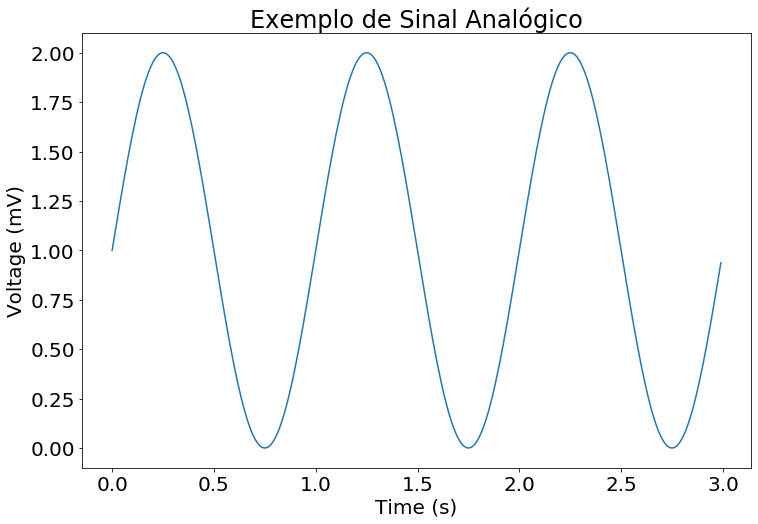

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 20})
import numpy as np
t = np.arange(0.0, 3.0, 0.01)
v = 1 + np.sin(2 * np.pi * t)
plt.plot(t,v)
plt.title('Exemplo de Sinal Analógico')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.show()

## Conversão Analógico Digital (A/D)

![Conversor Analógico Digital](ADC.png)

### Exemplo: Conversão de temperatura
![Conversor de Temperatura](ADC_Temperatura.png)

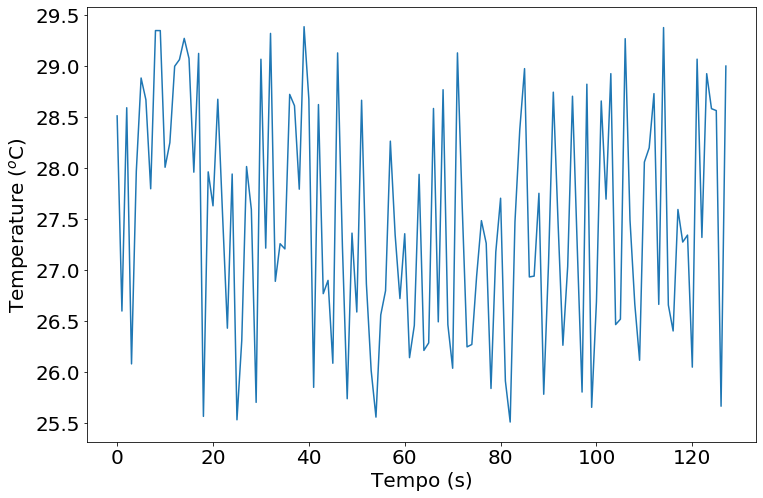

In [3]:
import matplotlib.pyplot as plt, numpy as np, random
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 20})
N=128
xs, ys = [], []
for i in range(N):
    xs.append(i)
    ys.append(random.uniform(25.5, 29.5))
plt.xlabel('Tempo (s)')
plt.ylabel('Temperature ($^o$C)')
plt.plot(xs, ys)
plt.show()

Tempo	Medida		Aproximação Digital
0	28.511446	28.5
10	28.007722	28.0
20	27.629394	27.6
30	29.067672	29.1
40	28.676047	28.7
50	26.587788	26.6
60	27.355618	27.4
70	26.035963	26.0
80	27.70405	27.7
90	27.061863	27.1
100	26.689254	26.7
110	28.058659	28.1
120	26.046713	26.0


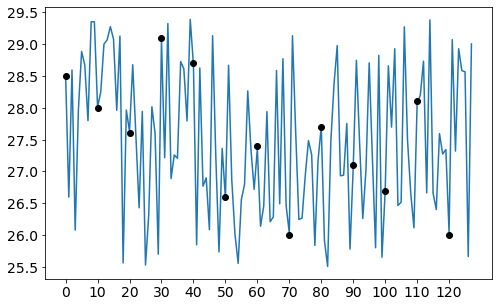

In [4]:
delta_x = 10
plt.plot(xs, ys)
plt.xticks(np.arange(0, N+1, delta_x))
print('Tempo\tMedida\t\tAproximação Digital')
for i in range(0, N, delta_x):
    x, yA, yD = i, round(ys[i], 6), round(ys[i], 1)
    plt.plot(x, yD, 'o', color='black');  
    print('{}\t{}\t{}'.format(x, yA, yD))    
plt.show()

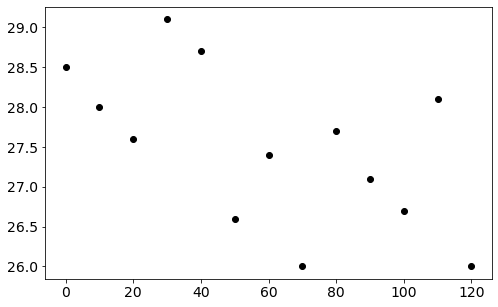

In [5]:
for i in range(0, N, delta_x):
    x, y = i, round(ys[i], 1)
    plt.plot(x, y, 'o', color='black');
plt.show()